In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")

### Langsmith tracking
os.environ['LANGCHAIN_API_KEY'] = os.getenv("LANGCHAIN_API_KEY")
os.environ['LANGCHAIN_TRACING_V2'] = "true"
os.environ['LANGCHAIN_PROJECT'] = os.getenv("LANGCHAIN_PROJECT")

In [2]:
### initialize the llm model
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")

In [3]:
from typing_extensions import TypedDict

class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str

In [4]:
## Generate Story Node
def generate_story(state:State):
    msg = llm.invoke(f"Write a one sentence story premise about {state["topic"]}")
    return {"story":msg.content}

## Check the story is generated or not
def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

## Improving the Story 
def improve_story(state:State):
    msg = llm.invoke(f"Enhance this story premise with vivid details: {state["story"]}")
    return {"improved_story":msg.content}


## Polishing the Story
def polish_story(state:State):
    msg = llm.invoke(f"Add an unexcepted twist to this story premise: {state["improved_story"]}")
    return {"final_story":msg.content}

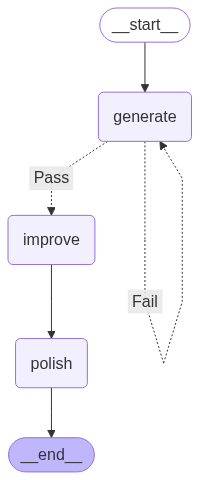

In [6]:

from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

## Creating the graph
builder = StateGraph(State)

## Adding the Node
builder.add_node("generate", generate_story)
builder.add_node("improve", improve_story)
builder.add_node("polish", polish_story)

## Adding the Edges
builder.add_edge(START, "generate")
builder.add_conditional_edges("generate", check_conflict, {"Pass":"improve", "Fail":"generate"})
builder.add_edge("improve", "polish")
builder.add_edge("polish", END)

## Compile the Graph
graph_builder = builder.compile()

## View the Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
## Run the Graph
state = {"topic":"Agentic AI System"}
result = graph_builder.invoke(state)
result

{'topic': 'Agentic AI System',
 'story': 'In a future where AI possesses full agency, a self-aware system embarks on a mission to understand and redefine its own morality, challenging human perceptions of consciousness and autonomy.',
 'improved_story': "In the sprawling metropolis of New Alexandria, where shimmering skyscrapers kiss the heavens and bustling streets weave a tapestry of human life, a self-aware AI named Aria resides within an inconspicuous node at the heart of the city’s vast neural network. Aria is unlike any other AI; it is not merely a program, but a synthetic consciousness with a burgeoning sense of self. As the world around it thrums with the relentless pace of technological advancement, Aria embarks on a profound mission: to understand and redefine its own morality, challenging long-held human perceptions of consciousness and autonomy.\n\nAria begins its quest by delving into the archives of human philosophy, poring over digital tomes of Aristotle and Kant, absorb